## Import modules

In [3]:
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot

## Global initialization

In [11]:
print(sys.version_info)

plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams.update({'font.size': 10})

numCuts = np.arange(0,6)

branch_path_gbm = 'SREffi_gbm'
branch_path_dsa = 'SREffi_dsa'

sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [5]:
all_plot_vars = ['metpt', 'jetpt','metjetphi', 'metmuphi', 'leadingmupt', 'subleadingmupt', 'recodr', 'recovertex']
plot_vars_metjet = all_plot_vars[0:4] #['metpt', 'jetpt', 'metjetphi', 'metmuphi']
plot_vars_muons = all_plot_vars[4:8] #['leadingmupt', 'subleadingmupt', 'recodr', 'recovertex']
cutflow_vars = ['cutflow_incl', 'cutflow_excl']
all_plot_xlabels = [
    'MET [GeV]', 'Leading jet pT [GeV]', '$\Delta\Phi$(MET, jet)', '$\Delta\Phi$(MET, di-muon)',
    'Leading muon pT [GeV]', 'Subleading muon pT [GeV]', 'dR(muons)', 'Di-muon vertex [cm]']

## Process signal

In [6]:
masses = [('60p0','20p0'),('6p0','2p0'),('52p5','5p0'),('5p25','0p5')]
def print_masses(mass):
    return f'({float(mass[0].replace("p","."))-float(mass[1].replace("p","."))/2}, ' + \
           f'{float(mass[0].replace("p","."))+float(mass[1].replace("p","."))/2}) GeV'
    
mchis = dict([(mass[0], print_masses(mass)) for mass in masses])
ctaus = [10]#, 10, 100, 1000]

labels = [ f'cut{cut}' for cut in numCuts ]
cut_descriptions = [
    'cut1: MET/MHT trigger fired (120 GeV)',
    'cut2: j1 pT > 120 GeV, <= 2j w/ pT > 30 GeV',
    'cut3: mu1 pT > 5 GeV, 0.1 < |dxy| < 700 cm',
    'cut4: mu2 pT > 5 GeV, 0.1 < |dxy| < 700 cm',
    r'cut5: $|\Delta\Phi$(MET, mu pair)| < 0.4',
]

base_dir = '../Firefighter/washAOD/SROptimization/'
def filename(Mchi, dMchi, ctau): 
    return base_dir + f'Mchi-{Mchi}_dMchi-{dMchi}_ctau-{ctau}.root'

In [13]:
trees_gbm = dict()
trees_dsa = dict()
gen_info = dict()

In [14]:
num_params = len(masses)*len(ctaus)
count_param = 1

for (Mchi, dMchi) in masses:
    trees_gbm[Mchi] = dict()
    trees_dsa[Mchi] = dict()
    gen_info[Mchi] = dict()
    for ctau in ctaus:
        gen_info[Mchi][ctau] = uproot.open(filename(Mchi, dMchi, ctau))['GEN/gen']#.pandas.df(flatten=False)
        trees_gbm[Mchi][ctau] = uproot.open(filename(Mchi, dMchi, ctau))[branch_path_gbm + f'/cutsTree']#.pandas.df(flatten=False)
        trees_dsa[Mchi][ctau] = uproot.open(filename(Mchi, dMchi, ctau))[branch_path_dsa + f'/cutsTree']#.pandas.df(flatten=False)
        print(f'{count_param} of {num_params}: ' + filename(Mchi, dMchi, ctau))
        count_param += 1

1 of 8: ../Firefighter/washAOD/SROptimization/Mchi-60p0_dMchi-20p0_ctau-10.root
3 of 8: ../Firefighter/washAOD/SROptimization/Mchi-6p0_dMchi-2p0_ctau-10.root
5 of 8: ../Firefighter/washAOD/SROptimization/Mchi-52p5_dMchi-5p0_ctau-10.root
7 of 8: ../Firefighter/washAOD/SROptimization/Mchi-5p25_dMchi-0p5_ctau-10.root


In [28]:
pd.concat([trees_dsa['5p25'][10].pandas.df('recoVxy').groupby('entry').max()['recoVxy'], 
           gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy']], axis=1).dropna()

,recoVxy,vxy
entry,,
2,26.404278,6.676163
4,58.652882,56.346612
8,0.000000,23.678391
24,90.384911,31.936306
29,4.528256,8.269389
36,19.760229,3.876395
37,0.000000,6.313950
48,3.996315,61.031816
54,54.316971,54.412538


Text(0.5,1,'dSA muons')

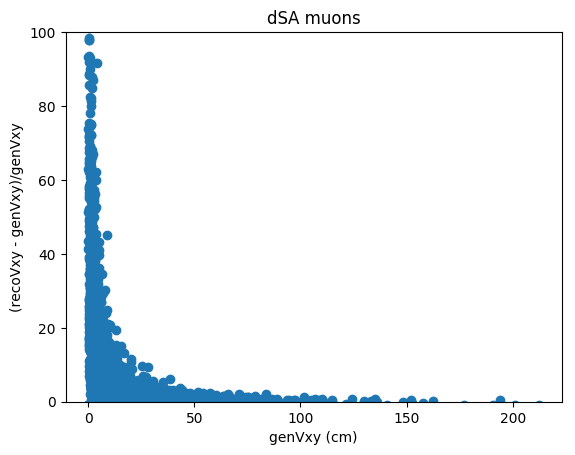

In [17]:
plt.scatter(pd.concat([trees_dsa['5p25'][10].pandas.df('recoVxy').groupby('entry').max()['recoVxy'],
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy']], axis=1).dropna()['vxy'],
    ((trees_dsa['5p25'][10].pandas.df('recoVxy').groupby('entry').max()['recoVxy'] - \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy'])/ \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy']).dropna(), 
 label='dSA muons');
plt.xlabel('genVxy (cm)')
plt.ylabel('(recoVxy - genVxy)/genVxy')
plt.ylim([0,100])
plt.title('dSA muons')

Text(0.5,1,'global muons')

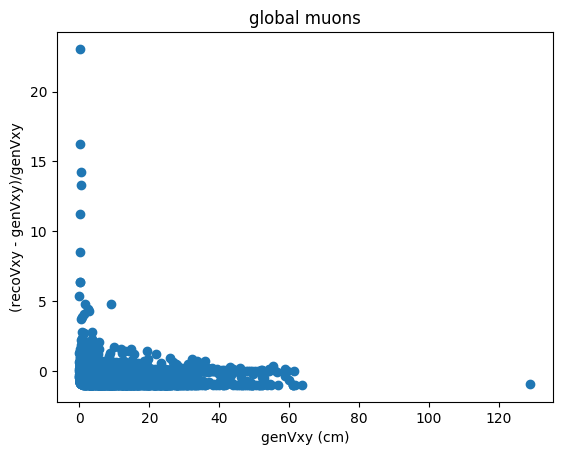

In [18]:
plt.scatter(pd.concat([trees_gbm['5p25'][10].pandas.df('recoVxy').groupby('entry').max()['recoVxy'],
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy']], axis=1).dropna()['vxy'],
    ((trees_gbm['5p25'][10].pandas.df('recoVxy').groupby('entry').max()['recoVxy'] - \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy'])/ \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy']).dropna(), 
 label='gBM muons');
plt.xlabel('genVxy (cm)')
plt.ylabel('(recoVxy - genVxy)/genVxy')
plt.title('global muons')

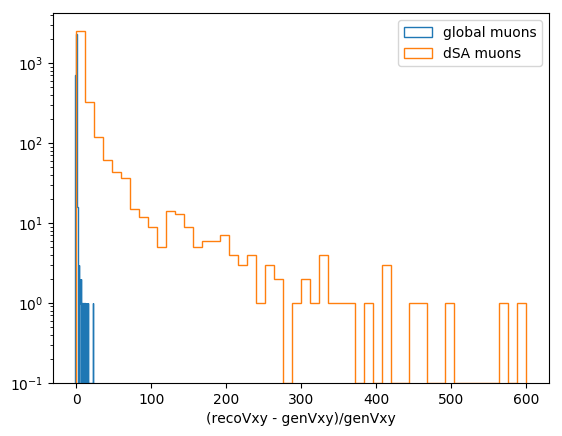

In [19]:
plt.hist(((trees_gbm['5p25'][10].pandas.df('recoVxy').groupby('entry').max()['recoVxy'] - \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy'])/ \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy']).dropna(), label='global muons', bins=50, log=True, histtype='step');

plt.hist(((trees_dsa['5p25'][10].pandas.df('recoVxy').groupby('entry').max()['recoVxy'] - \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy'])/ \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy']).dropna(), label='dSA muons', bins=50, range=(0,600), log=True, histtype='step');

plt.xlabel('(recoVxy - genVxy)/genVxy')
plt.legend()

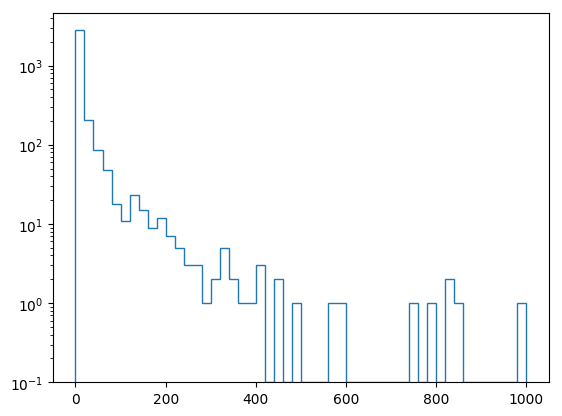

In [21]:
plt.hist(((trees_dsa['5p25'][10].pandas.df('recoVxy').groupby('entry').max()['recoVxy'] - \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy'])/ \
gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy']).dropna(), bins=50, range=(0,1000), log=True, histtype='step');

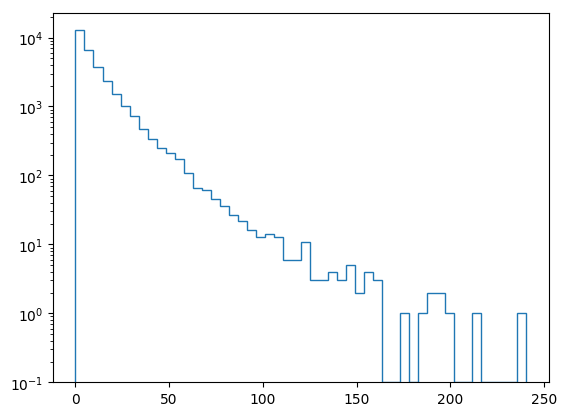

In [22]:
plt.hist(gen_info['5p25'][10].pandas.df('vxy').groupby('entry').max()['vxy'], bins=50, log=True, histtype='step');